In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [7]:
filename = "Word2Vec/Word2vec_Vector_3_0.01_70.csv"
df = pd.read_csv(filename)
df.head()

,Berita,Label,Category_id,Word2Vec Vector
0,"['duga', 'laku', 'keras', 'anak', 'isa', 'baja...",orang asing,4,"[0.4209834635257721, 0.05459590628743172, 0.23..."
1,"['miris', 'anak', 'jakarta', 'korban', 'keras'...",keluarga,0,"[0.2606388032436371, 0.2641247510910034, 0.067..."
2,"['polisi', 'aman', 'oknum', 'guru', 'sd', 'sin...",tenaga pendidik,2,"[0.21270155906677246, 0.3647041320800781, 0.25..."
3,"['anak', 'tenggelam', 'catat', 'hitam', 'keras...",keluarga,0,"[0.33772405982017517, 0.3632403016090393, 0.18..."
4,"['sangka', 'bullying', 'sma', 'internasional',...",teman,3,"[0.2748887538909912, 0.21491208672523499, 0.00..."


## Split Data (80:20)

In [8]:
# split the dataset into training and temp
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [9]:
train_df.head()

,Berita,Label,Category_id,Word2Vec Vector
969,"['ayah', 'pinrang', 'tangkap', 'sandera', 'anc...",keluarga,0,"[0.1796092838048935, 0.4170130491256714, -0.04..."
678,"['duga', 'anak', 'bawa', 'orang', 'kenal', 'at...",orang asing,4,"[0.10238317400217056, 0.2470414936542511, 0.27..."
894,"['dpa', 'laku', 'damping', 'korban', 'laku', '...",teman,3,"[0.35820725560188293, 0.20362965762615204, 0.2..."
33,"['inara', 'rusli', 'bawa', 'kunci', 'bukti', '...",keluarga,0,"[0.16313651204109192, 0.26164698600769043, 0.2..."
31,"['viral', 'video', 'bocah', 'ikat', 'tiang', '...",orang asing,4,"[0.2542842924594879, 0.24875245988368988, 0.26..."


In [10]:
temp_df.head()

,Berita,Label,Category_id,Word2Vec Vector
199,"['kali', 'anak', 'selebgram', 'aghnia', 'aniay...",pengasuh,1,"[0.3540416359901428, 0.3076167106628418, 0.085..."
789,"['perkosa', 'gadis', 'remaja', 'guru', 'ngaji'...",tenaga pendidik,2,"[0.2726620137691498, 0.3287689685821533, 0.108..."
174,"['milik', 'daycare', 'pekanbaru', 'sangka', 'l...",pengasuh,1,"[0.386101633310318, 0.5253521203994751, 0.0545..."
467,"['heboh', 'ayah', 'perkosa', 'anak', 'kandung'...",keluarga,0,"[0.27227282524108887, 0.37875014543533325, 0.0..."
66,"['ungkap', 'sadis', 'ayah', 'sorong', 'bunuhku...",keluarga,0,"[0.2422231286764145, 0.2516114413738251, 0.203..."


In [11]:
# split the dataset into validation and testing
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, shuffle=True)

In [13]:
print("Shape Data Training: ", train_df.shape)
print("Shape Data Validation: ", val_df.shape)
print("Shape Data Testing: ", test_df.shape)

Shape Data Training:  (780, 4)
Shape Data Validation:  (97, 4)
Shape Data Testing:  (98, 4)


In [14]:
train_df.to_csv("Train_Data.csv", index=False)
val_df.to_csv("Val_Data.csv", index=False)
test_df.to_csv("Test_Data.csv", index=False)

### See The Data

##### Bar Chart 1: Number of Train and Test Data

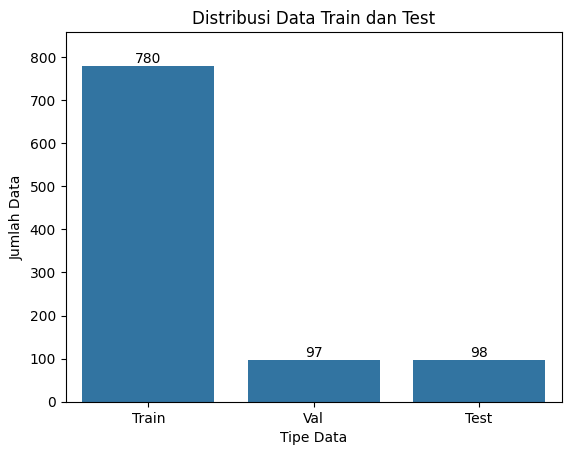

In [16]:

plt.figure()
bars = sns.barplot(x=['Train', 'Val','Test'], y=[len(train_df), len(val_df), len(test_df)])

# Add text labels on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', va='bottom', color='black')

plt.xlabel("Tipe Data")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data Train dan Test")
plt.ylim(0, max(len(train_df), len(val_df), len(test_df)) * 1.1)  # Adjust ylim for visibility
plt.show()

##### Bar Chart 2: Number of Perpetrator Categories in Train and Test

<Figure size 1000x500 with 0 Axes>

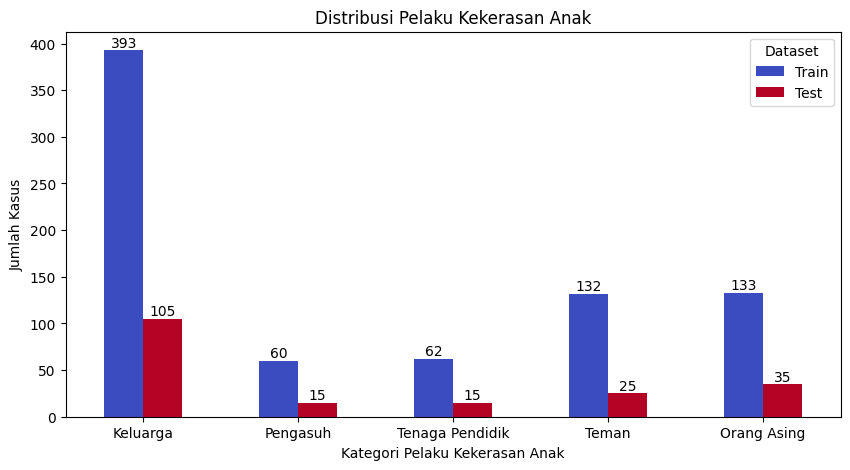

In [9]:
# Mapping Category_id to labels
category_labels = {
    0: "Keluarga",
    1: "Pengasuh",
    2: "Tenaga Pendidik",
    3: "Teman",
    4: "Orang Asing"
}

plt.figure(figsize=(10, 5))

# Assuming the perpetrator category is in a column named "perpetrator_category"
train_counts = train_df['Category_id'].value_counts()
test_counts = test_df['Category_id'].value_counts()

df_counts = pd.DataFrame({'Train': train_counts, 'Test': test_counts}).fillna(0)

ax = df_counts.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')

plt.xlabel("Kategori Pelaku Kekerasan Anak")
plt.ylabel("Jumlah Kasus")
plt.title("Distribusi Pelaku Kekerasan Anak")
plt.xticks(rotation=0)
plt.legend(title="Dataset")

# Change X-tick labels to category names
ax.set_xticklabels([category_labels[idx] for idx in df_counts.index])

# Add text labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.show()